![Image of Yaktocat](https://i.imgur.com/jfbcpSS.jpg)

## Data Visualization
Data visualization is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers. Visualizing data is an esstential part of data analysis and machine learning, but choosing the right type of visualization is often challenging. This guide provides an introduction to popluar data visualization techniques, by presenting sample use cases and providing code examples using Python.

Types of graphs covered:

 - Line graph
 - Scatter plot
 - Histogram and Frequency Distribution
 - Heatmap
 - Contour Plot
 - Box Plot
 - Bar Chart

## Import libraries

- [Matplotlib](https://matplotlib.org/): Plotting and visualization library for Python. We'll use the `pyplot` module from `matplotlib`. As convention, it is often imported as `plt`.
- [Seaborn](https://seaborn.pydata.org/): An easy-to-use visualizetion library that builds on top of Matplotlib and lets you create beautiful charts with just a few lines of code.

In [15]:
# Uncomment the next line to install the required libraries
# !pip install matplotlib seaborn --upgrade --quiet

In [16]:
# Import libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Configuring styles
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Line Chart

A line chart displays information as a series of data points or markers, connected by a straight lines. You can customize the shape, size, color and other aesthetic elements of the markers and lines for better visual clarity.

### Example 

We'll create a line chart to compare the yields of apples and oranges over 12 years in the imaginary region of Hoenn.

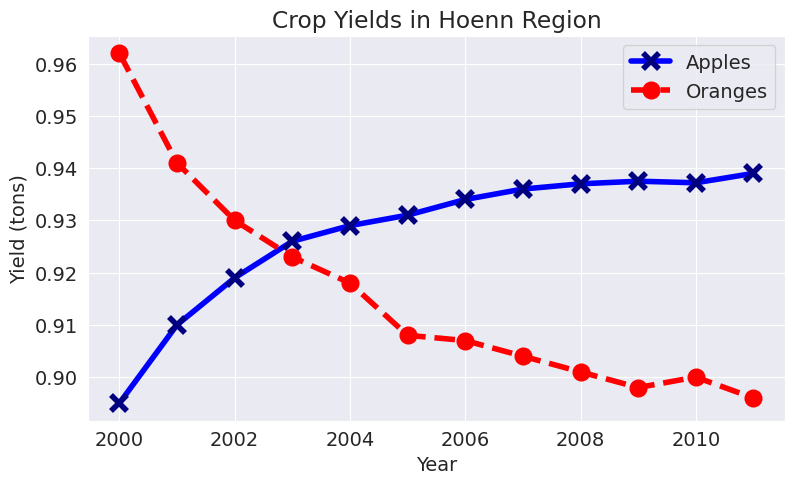

In [18]:
# Sample data
years = range(2000, 2012)
apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931, 0.934, 0.936, 0.937, 0.9375, 0.9372, 0.939]
oranges = [0.962, 0.941, 0.930, 0.923, 0.918, 0.908, 0.907, 0.904, 0.901, 0.898, 0.9, 0.896, ]

# First line
plt.plot(years, apples, 'b-x', linewidth=4, markersize=12, markeredgewidth=4, markeredgecolor='navy')

# Second line
plt.plot(years, oranges, 'r--o', linewidth=4, markersize=12,);

# Title
plt.title('Crop Yields in Hoenn Region')

# Line labels
plt.legend(['Apples', 'Oranges'])

# Axis labels
plt.xlabel('Year'); plt.ylabel('Yield (tons)');

## Scatter Plot
In a scatter plot, the values of 2 variables are plotted as points on a 2-dimensional grid. Additonally, you can also use a third variable to determine the size or color of the points.

### Example
The [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) provides samples measurements of sepals and petals for 3 species of flowers. The Iris dataset is included with the `seaborn` library, and can be loaded as a `pandas` dataframe.

In [19]:
# Load data into a Pandas dataframe
data = sns.load_dataset("iris")

# View the data
data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
27,5.2,3.5,1.5,0.2,setosa
64,5.6,2.9,3.6,1.3,versicolor
26,5.0,3.4,1.6,0.4,setosa
89,5.5,2.5,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


We can use a scatter plot to visualize sepal length & sepal witdh vary across different species of flowers. The points for each species form a separate cluster, with some overlap between the Versicolor and Virginica species.

Text(0.5, 1.0, 'Flowers')

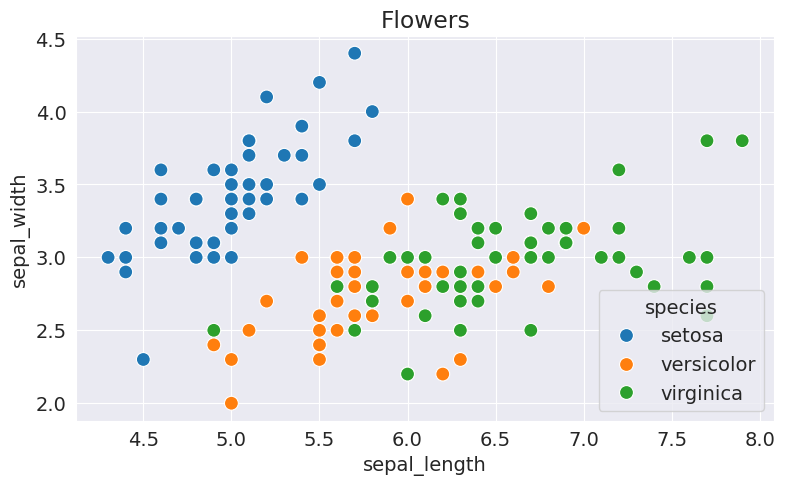

In [20]:
# Create a scatter plot
sns.scatterplot(
    data=data, 
    x="sepal_length", 
    y="sepal_width", 
    hue="species", 
    s=100
)

plt.title("Flowers")

## Histogram and Frequency Distribution

A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

### Example
We can use a histogram to visualize how the values of sepal width are distributed. 

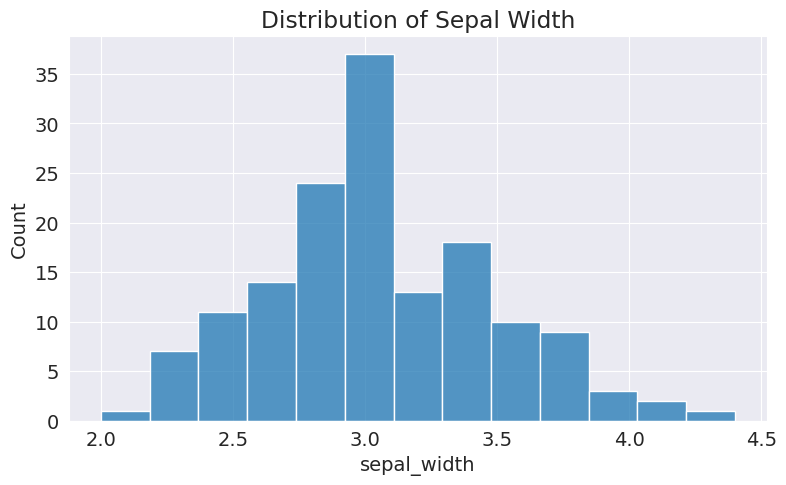

In [21]:
plt.title("Distribution of Sepal Width")

sns.histplot(data.sepal_width, kde=False);

We can immediately see that values of sepal width fall in the range 2.0 - 4.5, and around 35 values are in the range 2.9 - 3.1. We can also look at this data as a frequency distribution, where the values on Y-axis are percentagess instead of counts.

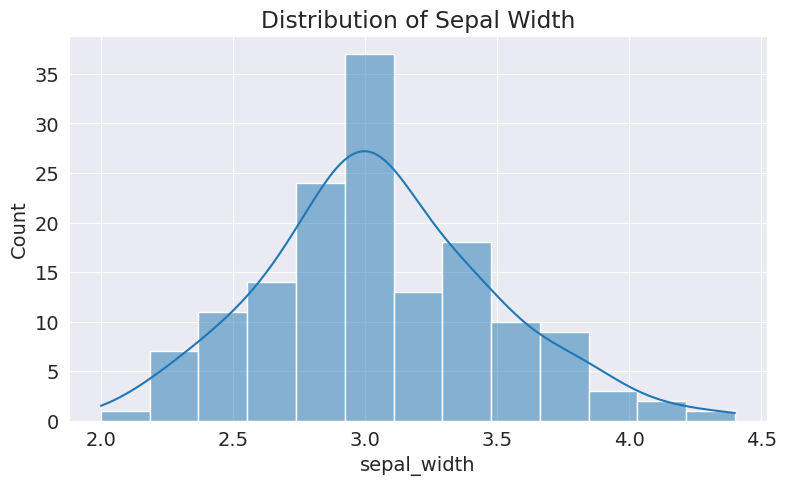

In [22]:
plt.title("Distribution of Sepal Width")

sns.histplot(data.sepal_width, kde=True);

## Heatmap

A heatamp is used to visualize 2-dimensional data like a matrix or a table using colors.

### Example
We'll use another sample dataset from Seaborn, called "flights", to visualize monthly passenger footfall at an airport over 12 years.

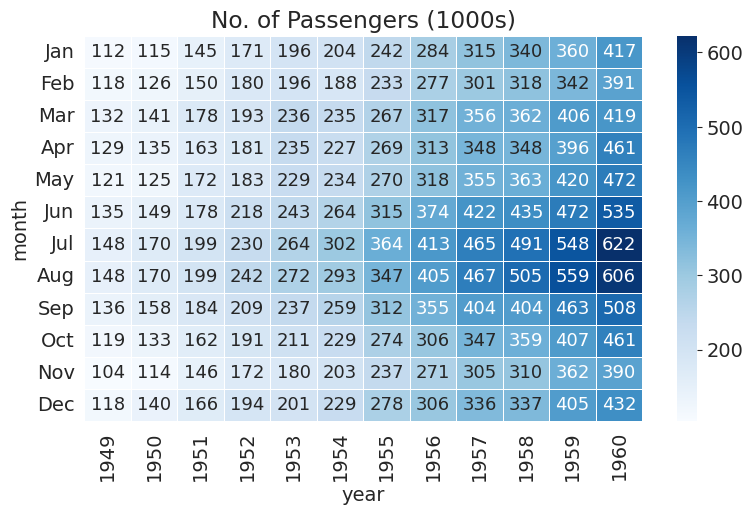

In [23]:
# Load the example flights dataset as a matrix
flights = sns.load_dataset("flights").pivot(
    index="month", 
    columns="year", 
    values="passengers"
)

# Chart Title
plt.title("No. of Passengers (1000s)")

# Draw a heatmap with the numeric values in each cell
sns.heatmap(flights, 
            fmt="d", 
            annot=True, 
            linewidths=.5, 
            cmap='Blues',
            annot_kws={"fontsize":13});

## Contour Plot

Contour plot uses contours or color-coded regions helps us to visualize 3 numerical variables in two dimensions. One variable is represented on the horizontal axis and a second variable is represented on the vertical axis. The third variable is represented by a color gradient and isolines (lines of constant value). 

## Example
We can visulize the values of sepal width & sepal length from the flowers dataset using a contour plot. The shade of blue represent the density of values in a region of the graph.

<Axes: title={'center': 'Flowers'}, xlabel='sepal_length', ylabel='sepal_width'>

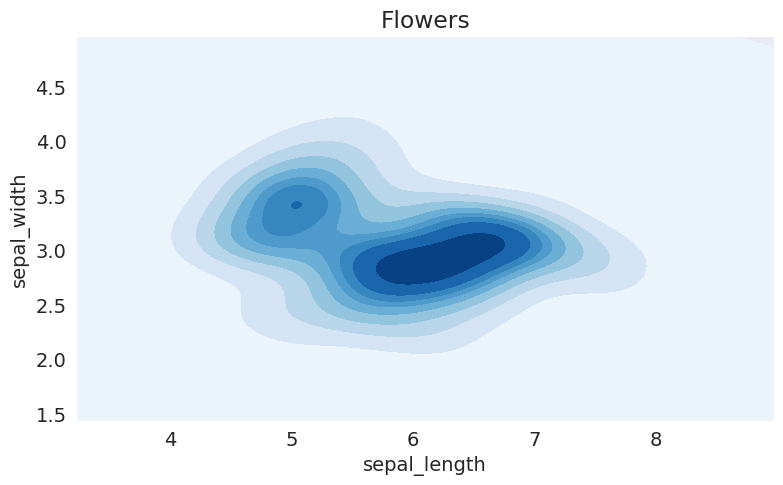

In [24]:
plt.title("Flowers")
sns.kdeplot(
    data=data,
    x="sepal_length",
    y="sepal_width",
    fill=True,       
    thresh=0,        
    cmap="Blues"
)

We can segment speicies of flowers by creating multiple contour plots with different colors.

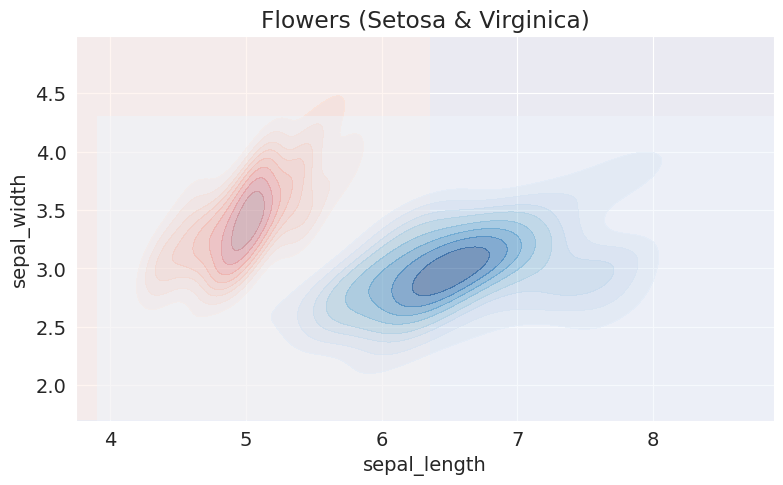

In [25]:
fig, ax = plt.subplots()
setosa = data[data.species == 'setosa']
virginica = data[data.species == 'virginica']

sns.kdeplot(
    data=setosa,
    x="sepal_length",
    y="sepal_width",
    fill=True,
    cmap="Reds",
    thresh=0,
    alpha=0.5,
    ax=ax
)

sns.kdeplot(
    data=virginica,
    x="sepal_length",
    y="sepal_width",
    fill=True,
    cmap="Blues",
    thresh=0,
    alpha=0.5,
    ax=ax
)

ax.set_title("Flowers (Setosa & Virginica)")
plt.show()


## Box Plot
A box plot shows the distribution of data along a single axis, using a "box" and "whiskers". The lower end of the box represents the 1st quartile (i.e. 25% of values are below it), and the upper end of the box represents the 3rd quartile (i.e. 25% of values are above it). The median value is represented via a line inside the box. The "whiskers" represent the minimum & maximum values (sometimes excluding outliers, which are represented as dots).

### Example
We'll use another sample dataset included with Seaborn, called "tips". The dataset contains information about the sex, time of day, total bill and tip amount for customers visiting a restraurant over a week.

In [26]:
# Load the example tips dataset
tips = sns.load_dataset("tips");
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


We can use a box plot to visualize the distribution of total bill for each day of the week, segmented by whether the customer was a smoker.

<Axes: title={'center': 'Daily Total Bill'}, xlabel='day', ylabel='total_bill'>

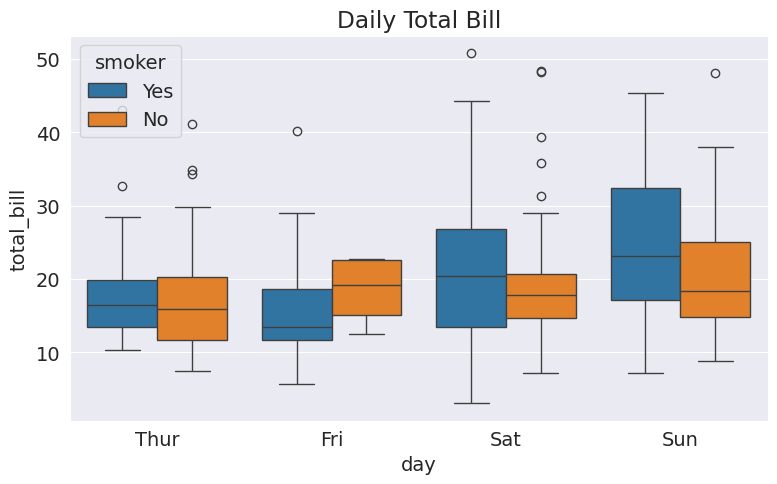

In [27]:
# Chart title
plt.title("Daily Total Bill")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(data=tips,x="day",y="total_bill",hue="smoker")

## Bar Chart

A bar chart presents categorical data with rectangular bars with heights proportional to the values that they represent. If there are multiple values for each category, then a bar plot can also represent the average value, with confidence intervals.


### Example
We can use a bar chart visulize the average value of total bill for different days of the week, segmented by sex, for the "tips" dataset

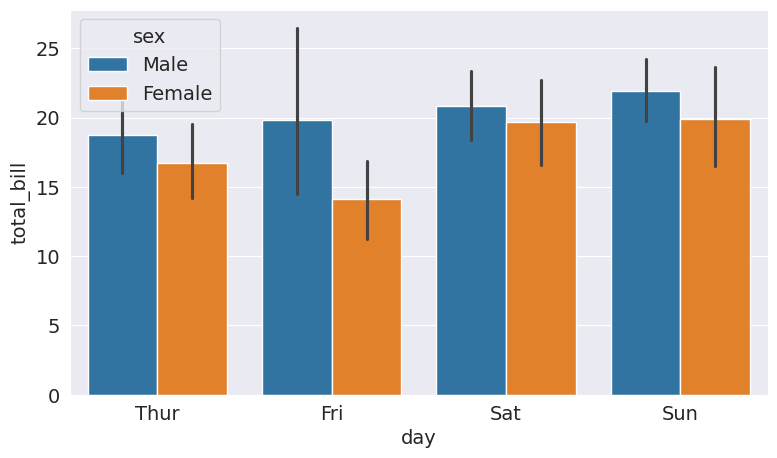

In [28]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips);

## Further Reading

This guide intends to serve as introduction to the most commonly used data visualization techniques. With minor modifications to the examples shown above, you can visualize a wide variety of datasets. Visit the official documentation websites for more examples & tutorials:

- Seaborn: https://seaborn.pydata.org/tutorial.html
- Matplotlib: https://matplotlib.org/tutorials/index.html